In [11]:
import time
import hashlib
import hmac
import matplotlib.pyplot as plt
from Aes import AES
import Chacha

In [12]:
def generate_hmac_sha256(key, data):
    return hmac.new(key, data, hashlib.sha256).digest()


def bytes_to_int(key_bytes):
    return int.from_bytes(key_bytes, byteorder='big')

def encrypt_chamac(key, msg, nonce):
    cipher = Chacha.chacha20_encrypt(msg, key, nonce)
    hmac_digest = generate_hmac_sha256(key, cipher)
    return hmac_digest, cipher

def decrypt_chamac(key, hmac_digest, cipher, nonce):
    if hmac_digest != generate_hmac_sha256(key, cipher):
        return "HMAC mismatch. Data is tampered"
    return Chacha.chacha20_decrypt(cipher, key, nonce)


In [13]:
plaintext = b"Hello, World!"
key = b"abcdefghijklmnopqrstuvwxyz123456"


master_key = bytes_to_int(key)

aes = AES(master_key)
aes_ciphertext = aes.encrypt(int.from_bytes(plaintext, byteorder='big'))

nonce = b'\0' * 8
hmac_digest, chamac_ciphertext = encrypt_chamac(key, plaintext, nonce)


start_time_aes = time.time()
for i in range(256):
    aes = AES(bytes([i]) * 16)
    aes_plaintext = aes.decrypt(aes_ciphertext)
    if aes_plaintext == plaintext:
        break
end_time_aes = time.time()

In [14]:
start_time_chamac = time.time()
for i in range(512):
    chamac_plaintext = decrypt_chamac(
        key, hmac_digest, chamac_ciphertext, nonce)
    if chamac_plaintext != plaintext:
        break
end_time_chamac = time.time()


time_taken_aes = end_time_aes - start_time_aes
time_taken_chamac = end_time_chamac - start_time_chamac

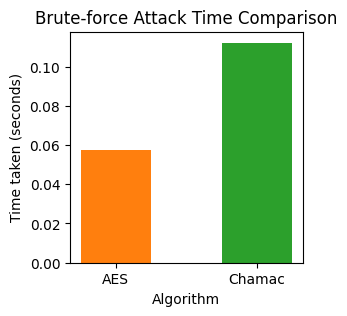

Time taken for AES brute-force attack: 0.05745267868041992
Time taken for Chamac brute-force attack: 0.11217045783996582
Chamac has better security based on brute-force attack time.


In [15]:
labels = ['AES', 'Chamac']
times = [time_taken_aes, time_taken_chamac]
plt.figure(figsize=(3,3))
plt.bar(labels, times, color=['#ff7f0e', '#2ca02c'], width=0.5, align='center')
plt.xlabel('Algorithm')
plt.ylabel('Time taken (seconds)')
plt.title('Brute-force Attack Time Comparison')
plt.show()

print("Time taken for AES brute-force attack:", time_taken_aes)
print("Time taken for Chamac brute-force attack:", time_taken_chamac)


if time_taken_aes > time_taken_chamac:
    print("AES has better security based on brute-force attack time.")
else:
    print("Chamac has better security based on brute-force attack time.")
